# Publicaciones NILM/NILMTK - Estado del Arte

Se usa el programa [Publish or Perish](https://harzing.com/resources/publish-or-perish/windows) para realizar una busqueda de las publicaciones en [GoogleScholar](https://scholar.google.es/)

El criterio de busqueda contempla las publicaciones que en su titulo tengan las siguientes palabras:
- Non-Intrusive Load Monitoring
- Nonintrusive Load Monitoring

Adicionalmente se realiza una búsqueda para las publicaciones que en sus palabras clave hagan referencia a NILMTK

La busqueda se realiza entre los años 1990 y 2019 (consulta al 27 de Diciembre de 2019)

**Idea original de Oliver Parson:** 
- http://blog.oliverparson.co.uk/2015/03/overview-of-nilm-field.html
- https://github.com/oliparson/nilm-papers

In [34]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Publicaciones NILM

### Archivo CSV de consulta de publicaciones NILM

In [4]:
df=pd.read_csv('C:/data/NILM_search.csv')#, encoding = 'latin1')
df.sort_values(by='Cites', inplace=True, ascending=False)
print(df.shape)
df.head(3)

(585, 23)


,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,CitationURL,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age
152,2118,GW Hart,Nonintrusive appliance load monitoring,1992,Proceedings of the IEEE,ieeexplore.ieee.org,https://ieeexplore.ieee.org/abstract/document/...,https://scholar.google.com/scholar?cites=13659...,7,2020-01-11 17:36:20,...,NaN,NaN,NaN,NaN,NaN,2118,75.64,2118,1,28
146,771,"M Zeifman, K Roth",Nonintrusive appliance load monitoring: Review...,2011,IEEE transactions on Consumer …,ieeexplore.ieee.org,https://ieeexplore.ieee.org/abstract/document/...,https://scholar.google.com/scholar?cites=11426...,13,2020-01-11 17:36:20,...,NaN,NaN,NaN,NaN,NaN,771,85.67,386,2,9
199,642,"A Zoha, A Gluhak, M Imran, S Rajasegarar",Non-intrusive load monitoring approaches for d...,2012,Sensors,mdpi.com,https://www.mdpi.com/1424-8220/12/12/16838,https://scholar.google.com/scholar?cites=18443...,1,2020-01-11 17:36:20,...,NaN,NaN,NaN,NaN,NaN,642,80.25,161,4,8


### Numero de publicaciones NILM por año

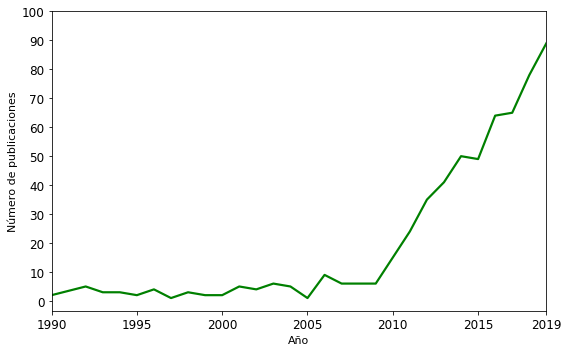

In [48]:
rcParams['figure.figsize'] = (8, 5)
nonzero_years = df[(df.Year>=1990) & (df.Year<=2019)]
pd.DataFrame(nonzero_years.Year.value_counts()).sort_index().plot(color='g', linewidth=2.2, fontsize=12, legend=False)
plt.xlabel('Año', fontsize=11)
plt.ylabel('Número de publicaciones', fontsize=11)
a=[1990, 1995, 2000, 2005, 2010, 2015, 2019]
plt.xticks(a)
plt.xlim(1990, 2019)
plt.yticks(np.arange(0, 101, 10))
plt.tight_layout() #no corta el eje
plt.savefig('C:/data/pubs.svg', bbox_inches='tight')

### Numero de citaciones por Autor

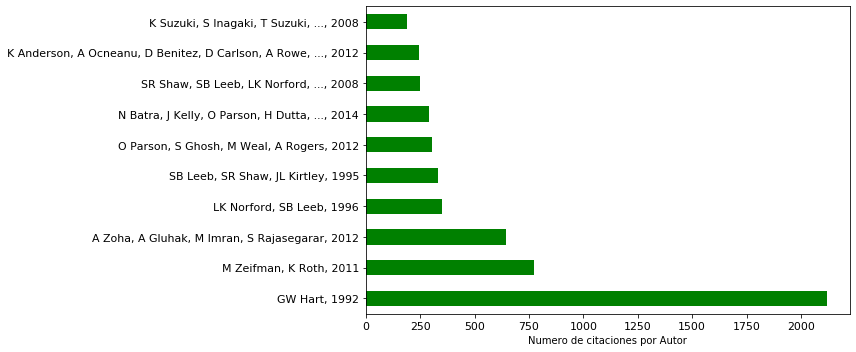

In [23]:
plt.figure(figsize=(12,5))
df['Author, year'] = df['Authors'] + ', ' + [str(x) for x in df['Year']]
df.set_index('Author, year').Cites.head(10).plot(kind='barh', color='g', fontsize=11)
plt.xlabel('Numero de citaciones por Autor')
plt.ylabel('')
plt.tight_layout()

### Numero de citaciones por año

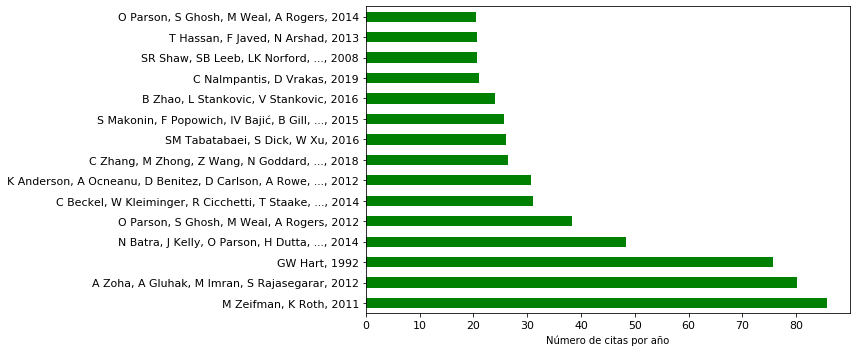

In [20]:
plt.figure(figsize=(12,5))
df.set_index('Author, year').sort_values(by='CitesPerYear',ascending=False)['CitesPerYear'].head(15).plot(kind='barh', color='g', fontsize=11)
plt.ylabel('')
plt.xlabel('Número de citas por año')
plt.tight_layout()